<a href="https://colab.research.google.com/github/shr968/ML-Lab/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving LR.csv to LR.csv


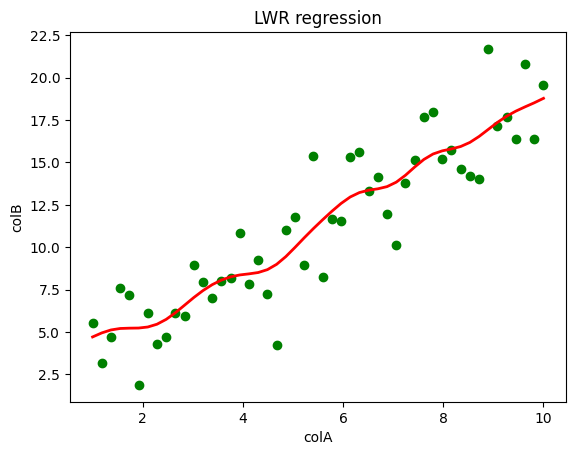

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kernel(x0,X,tau):
  return np.diag(np.exp(-np.sum((X-x0)**2,axis=1)/(2*tau**2)))

def predict(X,y,tau):
  return np.array([(x @ np.linalg.pinv(X.T @ kernel(x,X,tau) @ X) @ X.T @ kernel(x,X,tau) @ y) for x in X])

data=pd.read_csv('LR.csv')
X=np.hstack((np.ones((len(data),1)),data[['colA']].values))
y=data['colB'].values
idx=X[:,1].argsort()
ypred=predict(X,y,tau=0.5)
plt.scatter(X[:,1],y,color='green')
plt.plot(X[idx,1],ypred[idx],color='red',linewidth=2)
plt.xlabel('colA')
plt.ylabel('colB')
plt.title('LWR regression')
plt.show()